In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt          
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
#libary getting stock data
from pandas_datareader import data as pdr

# library to forecast time series stock prices
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2021, 12, 3), datetime.date(2019, 3, 9))

In [6]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-03-08,39.935001,39.674999,39.794998,39.875000,212281.0,39.875000
1,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749
2,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000
3,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498
4,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249


In [8]:
m = Prophet()

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
#chaning columns names. fbprophet needst to get column name 'ds' for date and 'y' for value
df.columns = ['ds', 'High', 'Low', 'Open', 'y', 'Volume', 'Adj Close']
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2019-03-08,39.935001,39.674999,39.794998,39.875000,212281.0,39.875000
1,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749
2,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000
3,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498
4,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249
...,...,...,...,...,...,...,...
686,2021-11-23,66.724998,66.007500,66.250000,66.269997,357520.0,66.269997
687,2021-11-24,67.187500,66.230003,66.537498,66.772499,257719.0,66.772499
688,2021-11-25,67.239998,66.962502,67.062500,67.062500,245777.0,67.062500
689,2021-11-26,66.300003,65.337502,65.997498,65.512497,674999.0,65.512497


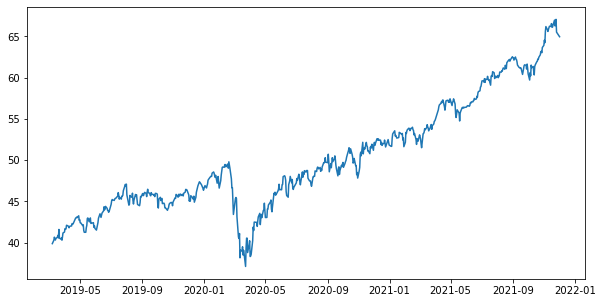

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.set_index('ds').y)
plt.show()

In [12]:
m.fit(df)

Initial log joint probability = -3.04897


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2450.88    0.00203359       451.463           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2482.64    0.00251037       554.198           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       2491.62   0.000125287        328.81    6.54e-07       0.001      362  LS failed, Hessian reset 
     299       2496.06   0.000702187       213.475      0.7739      0.7739      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2504.26    0.00264336        136.29       2.467      0.2467      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2509.93    0.00318507       562.263           1           1      6

In [13]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1051,2022-11-28
1052,2022-11-29
1053,2022-11-30
1054,2022-12-01
1055,2022-12-02


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1051,2022-11-28,79.673152,55.836667,104.465339
1052,2022-11-29,79.741593,55.643209,104.408600
1053,2022-11-30,79.743373,56.002153,104.894294
1054,2022-12-01,79.738588,55.706080,104.390804
1055,2022-12-02,79.715472,55.690945,105.186000


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-08,41.227087,40.457826,42.472404,41.227087,41.227087,0.211130,0.211130,0.211130,0.285111,0.285111,0.285111,-0.073980,-0.073980,-0.073980,0.0,0.0,0.0,41.438218
1,2019-03-11,41.333678,39.915052,41.909920,41.333678,41.333678,-0.359148,-0.359148,-0.359148,0.313446,0.313446,0.313446,-0.672594,-0.672594,-0.672594,0.0,0.0,0.0,40.974530
2,2019-03-12,41.369208,39.958660,41.891114,41.369208,41.369208,-0.481425,-0.481425,-0.481425,0.362956,0.362956,0.362956,-0.844381,-0.844381,-0.844381,0.0,0.0,0.0,40.887784
3,2019-03-13,41.404739,39.747761,41.787127,41.404739,41.404739,-0.653590,-0.653590,-0.653590,0.347346,0.347346,0.347346,-1.000936,-1.000936,-1.000936,0.0,0.0,0.0,40.751149
4,2019-03-14,41.440269,39.628615,41.658360,41.440269,41.440269,-0.816062,-0.816062,-0.816062,0.325669,0.325669,0.325669,-1.141731,-1.141731,-1.141731,0.0,0.0,0.0,40.624207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2022-11-28,78.316271,55.836667,104.465339,54.771526,102.910661,1.356881,1.356881,1.356881,0.313446,0.313446,0.313446,1.043436,1.043436,1.043436,0.0,0.0,0.0,79.673152
1052,2022-11-29,78.352726,55.643209,104.408600,54.684502,103.031273,1.388867,1.388867,1.388867,0.362956,0.362956,0.362956,1.025911,1.025911,1.025911,0.0,0.0,0.0,79.741593
1053,2022-11-30,78.389182,56.002153,104.894294,54.633773,103.181449,1.354190,1.354190,1.354190,0.347346,0.347346,0.347346,1.006844,1.006844,1.006844,0.0,0.0,0.0,79.743373
1054,2022-12-01,78.425638,55.706080,104.390804,54.584356,103.357918,1.312950,1.312950,1.312950,0.325669,0.325669,0.325669,0.987281,0.987281,0.987281,0.0,0.0,0.0,79.738588


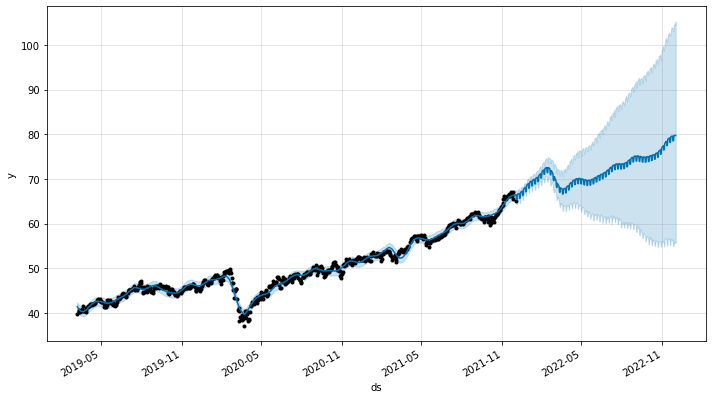

In [16]:
m.plot(forecast).autofmt_xdate()

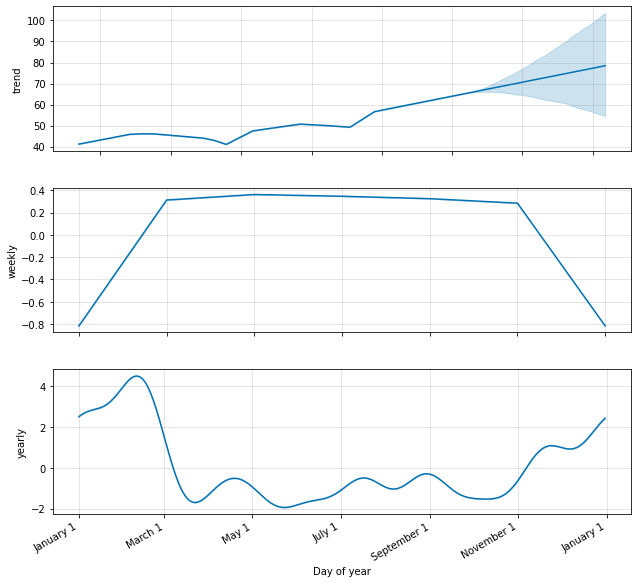

In [17]:
m.plot_components(forecast).autofmt_xdate()

In [18]:
df['log_y'] = np.log(df.y)
df['cap' ]= 90

m = Prophet(growth = 'logistic')
m.fit(df)

Initial log joint probability = -3.30588


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2389.31     0.0041487       201.381           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2400.86     0.0103937       286.653           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       2405.61   8.12988e-05       49.9285   8.401e-07       0.001      332  LS failed, Hessian reset 
     299       2408.77     0.0167149       288.085      0.5315           1      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       2411.59   0.000248476       142.989   7.348e-07       0.001      509  LS failed, Hessian reset 
     374       2412.58    0.00016965       94.4405   2.847e-06       0.001      586  LS failed, Hessian reset 
     399       2413.03   0.000164117  

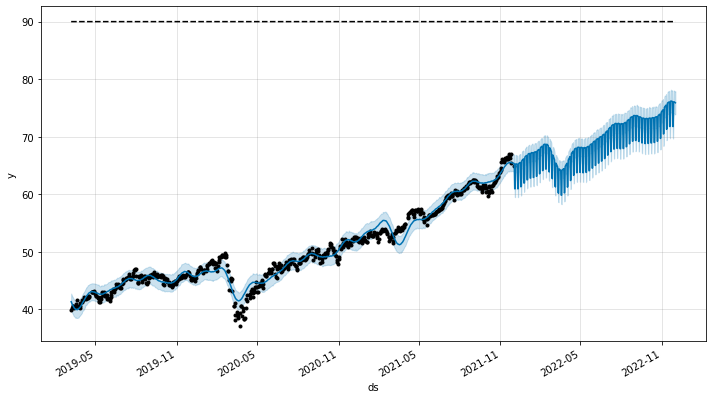

In [19]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 90
fcst = m.predict(future)
m.plot(fcst).autofmt_xdate()
#m.plot(fcst, uncertainty=True).autofmt_xdate()

In [20]:
m.changepoints

22    2019-04-09
44    2019-05-14
66    2019-06-14
88    2019-07-16
110   2019-08-15
132   2019-09-17
154   2019-10-17
176   2019-11-18
198   2019-12-18
220   2020-01-22
242   2020-02-21
264   2020-03-24
287   2020-04-28
309   2020-06-01
331   2020-07-01
353   2020-07-31
375   2020-09-02
397   2020-10-02
419   2020-11-03
441   2020-12-03
463   2021-01-07
485   2021-02-08
507   2021-03-10
529   2021-04-13
551   2021-05-14
Name: ds, dtype: datetime64[ns]

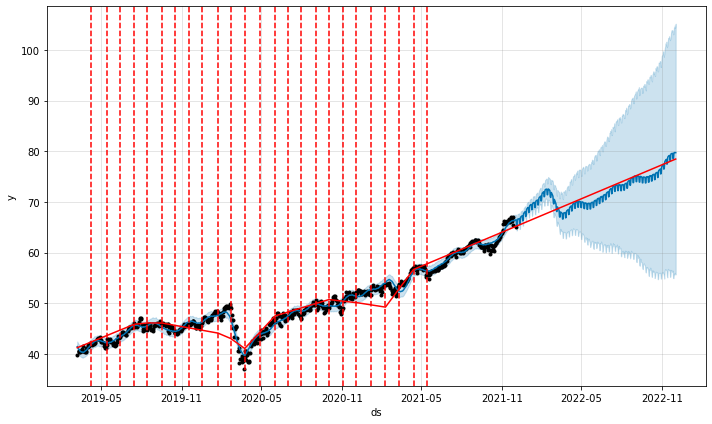

In [21]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

Initial log joint probability = -3.04897
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2498.73     0.0180761       2273.94           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2564.82    0.00151971       2947.89      0.7728      0.7728      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2598.44   0.000132293       266.484           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2628.01    0.00433054       1479.88           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2670.66     0.0127084       1816.09           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

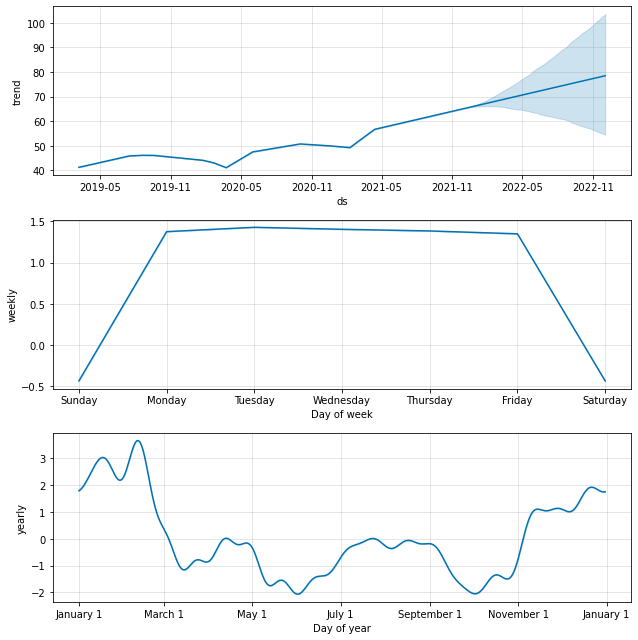

In [22]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(df)
fig = m.plot_components(forecast)

# Plotly

In [23]:
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [24]:
trace = go.Scatter(
    name = 'Actual price',
    mode = 'markers',
    x = list(forecast['ds']),
    y = list(df['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)


In [25]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)


In [26]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [27]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [28]:
tracex = go.Scatter(
    name = 'Actual price',
   mode = 'markers',
   x = list(df['ds']),
   y = list(df['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [29]:
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)


In [30]:
fig = py.offline.iplot(figure)
# plt.show()

In [31]:
py.offline.plot(figure, filename='myplot.html')

'myplot.html'

import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [46]:
df.head()

,ds,High,Low,Open,y,Volume,Adj Close,log_y,cap
0,2019-03-08,39.935001,39.674999,39.794998,39.875000,212281.0,39.875000,3.685750,90
1,2019-03-11,40.355000,40.090000,40.235001,40.283749,281421.0,40.283749,3.695948,90
2,2019-03-12,40.665001,40.105000,40.185001,40.660000,394741.0,40.660000,3.705245,90
3,2019-03-13,40.657501,40.395000,40.400002,40.537498,232854.0,40.537498,3.702227,90
4,2019-03-14,40.567501,40.222500,40.327499,40.311249,341492.0,40.311249,3.696631,90


In [48]:
df_melt = df.melt(id_vars=['ds', 'Volume', 'log_y'])
df_melt.head()

,ds,Volume,log_y,variable,value
0,2019-03-08,212281.0,3.685750,High,39.935001
1,2019-03-11,281421.0,3.695948,High,40.355000
2,2019-03-12,394741.0,3.705245,High,40.665001
3,2019-03-13,232854.0,3.702227,High,40.657501
4,2019-03-14,341492.0,3.696631,High,40.567501


In [51]:
fig1 = px.line(df_melt, x='ds', y='value', color='variable' )
fig1.show()

In [53]:
import plotly.express as px

fig2 = px.bar(df, x = list(df['ds']), y = list(df['y']),barmode="group")
fig2.show()

In [54]:
with open('p_graph.html', 'a') as f:
    f.write(fig1.to_html(full_html = False, include_plotlyjs = 'cdn'))
    f.write(fig2.to_html(full_html = False, include_plotlyjs = 'cdn'))